# 项目二：清理与分析数据
## 收集

In [14]:
# 导入需要的库
import numpy as np
import pandas as pd
import json
import requests
import os
import matplotlib.pyplot as plt

In [15]:
# 收集数据集1
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

# 收集数据集2
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open (os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

# 收集数据集3
tweet_additionals = pd.read_json('tweet_json.txt', lines = True) # 函数参数 lines 默认为False,设置为 True 后可以按行读取该文件作为json对象
# 提取所需转发数（retweet_count）和喜欢数（favorite_count）以及用户id数据
tweet_additional = tweet_additionals[['id', 'retweet_count', 'favorite_count']]

In [16]:
# method-2, 收集文件 3 保存为 dataframe
# with open('tweet_json.txt', encoding='utf-8') as f:
#     tweet_array = []
#     for line in f.readlines():
#         d = json.loads(line)
#         tweet_array.append(d)
# tweet_additionals = pd.DataFrame(papers)

## 评估
### 目测评估

In [17]:
pd.set_option('max_colwidth',150) # 修改显示值长度
pd.set_option('display.max_rows', 1000) # 显示的最大行数（避免只显示部分行数据）

In [18]:
# 目测评估三个数据集
twitter_archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H htt...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""htt

In [19]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,1.566650e-01,True,Shetland_sheepdog,6.142850e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,7.419170e-02,True,Rhodesian_ridgeback,7.201000e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,1.385840e-01,True,bloodhound,1.161970e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,3.606870e-01,True,miniature_pinscher,2.227520e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,2.436820e-01,True,Doberman,1.546290e-01,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,2.637880e-01,True,Greater_Swiss_Mountain_dog,1.619920e-02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,5.827940e-02,True,fur_coat,5.444860e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,1.923050e-01,True,soft-coated_wheaten_terrier,8.208610e-02,True


In [20]:
tweet_additional

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


**twitter_archives数据集：**
* 有些行缺少狗的地位描述（全部都是None）

### 编程评估

**twitter_archives数据集**

In [21]:
twitter_archives.info()
# timestamp列的数据类型应该为datetime
# doggo、pupper、puppo、floofer列的数据类型应为分类数据
# tweet_id列数据应为字符串，image_predictions数据集、tweet_additional数据集也有同样的问题
# 数据集中包含转发数据181个，数据重复数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twitter_archives.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
962,750868782890057730,NaN,NaN,2016-07-07 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Milo. He hauled ass until he ran out of treadmill and then passed out from exhaustion. 11/10 sleep tight pupper https://t.co/xe1aGZNkcC,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/750868782890057730/photo/1,https://twitter.com/dog_rates/status/750868782890057730/photo/1,https://twitter.co...",11,10,Milo,None,None,pupper,None
614,796759840936919040,NaN,NaN,2016-11-10 17:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Romeo. He was just told that it's too cold for the pool. H*ckin nonsense. 11/10 would help fill up https://t.co/6hx7ur6sNI,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/796759840936919040/photo/1,https://twitter.com/dog_rates/status/796759840936919040/photo/1",11,10,Romeo,None,None,None,None
872,761371037149827077,NaN,NaN,2016-08-05 01:19:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Oh. My. God. 13/10 magical af https://t.co/Ezu6jQrKAZ,7.116948e+17,4.196984e+09,2016-03-20 23:23:54 +0000,"https://twitter.com/dog_rates/status/711694788429553666/photo/1,https://twitter.com/dog_rates/status/711694788429553666/photo/1",13,10,None,None,None,None,None
2163,669375718304980992,NaN,NaN,2015-11-25 04:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Billl. He's trying to be a ghost but he's not very good at it. 6/10 c'mon Billl https://t.co/ero0XfdGtY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669375718304980992/photo/1,6,10,Billl,None,None,None,None
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None


In [23]:
twitter_archives.name.value_counts()
# name列存在大量空值，以及'the'、'a'等不正确的名字

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
the                 8
Sadie               8
an                  7
Bailey              7
Buddy               7
Daisy               7
Toby                7
Leo                 6
Stanley             6
Jack                6
Scout               6
Oscar               6
Jax                 6
Koda                6
Rusty               6
Bella               6
Milo                6
Dave                6
Oakley              5
Sunny               5
Finn                5
Louis               5
Chester             5
George              5
Gus                 5
Phil                5
Sammy               5
very                5
Larry               5
Bentley             5
Alfie               5
Bruce               4
Derek               4
Maggie              4
Cassie    

In [24]:
twitter_archives.rating_denominator.value_counts()
# rating_denominator存在不等于10的数据，需要详细查看

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archives[twitter_archives['rating_denominator'] != 10][['text','rating_numerator', 'rating_denominator']]
# 对狗评级数据的抓取存在错误，有些推文中有多个‘/’形式的数据。
# 有些分母评级数据显著高于10(如'150'、'170')，这是对多只狗一起打分的结果

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t ...,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [26]:
twitter_archives[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [27]:
twitter_archives[twitter_archives['rating_numerator'] == 1776]
# 推文主题并未涉及狗，抓取的评级分数为日期。

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [28]:
twitter_archives.source
# 删除source列中多余的字符

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
5       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
6       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
7       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
8       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
9       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
10      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [29]:
sum(twitter_archives.expanded_urls.isnull())

59

In [30]:
sum(twitter_archives.expanded_urls.duplicated())
# expanded_urls列有59个空值，有137个重复值

137

In [31]:
status_list = twitter_archives[['doggo','pupper','puppo','floofer']]
(status_list != 'None').sum(axis=1).value_counts()
# 存在1976个狗的status数据缺失

0    1976
1     366
2      14
dtype: int64

In [32]:
twitter_archives[((status_list != 'None').sum(axis=1)) == 2]
# 有些推文里描写了狗的两种status，有14行数据记载了狗的两种status分类

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://t

**image_predictions数据集**

In [33]:
image_predictions.info()
# tweet_id列数据应为字符串

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_predictions.jpg_url.duplicated().sum()
# jpg_url列有66个重复项

66

In [35]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [36]:
image_predictions[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [37]:
image_predictions.p1.value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
German_shepherd                    20
Siberian_husky                     20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
teddy                              18
Shetland_sheepdog                  18
beagle                             18
Maltese_dog                        18
Eskimo_dog                         18
Shih-Tzu                           17
Rottweiler  

In [38]:
image_predictions[['p1_dog','p2_dog','p3_dog']].sum(axis = 1).value_counts()

3    1243
2     347
0     324
1     161
dtype: int64

**tweet_additional数据集**

In [39]:
tweet_additional.info()
# tweet_id列数据应为字符串
# 'id'应该改为'tweet_id'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [40]:
tweet_additional.retweet_count.isnull().sum()

0

In [41]:
tweet_additional.favorite_count.isnull().sum()

0

In [42]:
tweet_additional.id.duplicated().sum()

0

#### 质量
##### `twitter_archives` 表格
- 数据类型问题
>- timestamp列的数据类型应该为datetime
>- doggo、pupper、puppo、floofer列的数据类型应为分类数据
>- tweet_id列数据应为字符串，image_predictions数据集、tweet_additional数据集也有同样的问题
- 数据抓取错误
>- name列存在大量空值，以及'the'、'a'等不正确的名字
>- 对狗评级数据的抓取存在错误，有些推文中有多个‘/’形式的数据
>- 有些推文里描写了狗的两种status，有14行数据记载了狗的两种status分类
- 无关、冗余数据
>- 有些推文主题并未涉及狗，抓取的评级分数为日期简写或者其他与评级无关的数据。
>- expanded_urls列有59个空值，有137个重复值
>- 数据集中包含转发数据181个，数据重复数据
>- 删除source列中多余的字符
- 其他
>- 有些分母评级数据显著高于10(如'150'、'170')，这是对多只狗一起打分的结果
>- 给狗的评分进行分类
>- 存在1976个狗的status数据缺失(无法处理)


##### `image_predictions` 表格
- jpg_url列有66个重复项
- 三次预测结果可以综合为一个



#### 整洁度
- twitter_archives数据集中doggo、floofer、pupper、puppo四列都是描述狗的status的，应该并为一列
- tweet_additional数据集的columns'id'应该改为'tweet_id'
- 三个数据集合并为一个数据集



## 清理

In [43]:
# 备份三个数据集
twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy()
tweet_additional_clean = tweet_additional.copy()

### 处理无关、冗余数据
#### 问题描述1：twitter_archives数据集中包含转发数据181个，数据重复数据

##### 定义
删除twitter_archives数据集中retweeted_status_id不为空的数据

##### 代码

In [44]:
# 删除twitter_archives数据集中retweeted_status_id不为空的数据
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.retweeted_status_id.isnull()]

#### 测试

In [45]:
# 应为0值
twitter_archives_clean.retweeted_status_id.notnull().sum()

0

In [46]:
twitter_archives_clean.retweeted_status_user_id.notnull().sum()

0

In [47]:
twitter_archives_clean.retweeted_status_timestamp.notnull().sum()

0

In [48]:
# 现在retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp都为空值，应将该3列删除
twitter_archives_clean = twitter_archives_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [49]:
# 测试retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp三列是否都删除
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### 问题描述2：twitter_archives数据集中expanded_urls列有137个重复值

##### 定义
删除数据集中expanded_urls的空值和重复值的数据

##### 代码

In [50]:
# 删除空值
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.expanded_urls.notnull()]

In [51]:
# 查看expanded_urls列中重复值
twitter_archives_clean[twitter_archives_clean.expanded_urls.duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


In [52]:
# 删除时间靠前重复值
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean.tweet_id != 668587383441514497]

#### 测试

In [53]:
twitter_archives_clean[twitter_archives_clean.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [54]:
twitter_archives_clean[twitter_archives_clean.tweet_id == 668587383441514497]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [55]:
twitter_archives_clean[twitter_archives_clean.tweet_id == 791774931465953280]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None


#### 问题描述3：有些推文主题并未涉及狗，抓取的评级分数为日期。

##### 定义
删除与狗无关的推文数据，其tweet_id为749981277374128128、810984652412424192
##### 代码

In [56]:
drop_index = [749981277374128128,810984652412424192]

for id in drop_index:
    index_num = twitter_archives_clean[twitter_archives_clean.tweet_id == id].index[0]
    twitter_archives_clean = twitter_archives_clean.drop(index_num)

##### 测试

In [57]:
twitter_archives_clean[twitter_archives_clean.tweet_id == 749981277374128128]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [58]:
twitter_archives_clean[twitter_archives_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 问题描述4：image_predictions数据集中jpg_url列有66个重复项

##### 定义
删除数据集中jpg_url的重复且不为空值的数据

##### 代码

In [59]:
# 删除空值
image_predictions_clean = image_predictions_clean[image_predictions_clean.jpg_url.notnull()]

In [60]:
# 删除重复值
image_predictions_clean = image_predictions_clean[~(image_predictions_clean.jpg_url.duplicated())]

##### 测试

In [61]:
# 测试是否正确清理完成
image_predictions_clean[image_predictions_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 问题描述5：删除source列中多余的字符

##### 定义
用extract函数抓取'><'形式的字符


##### 代码

In [62]:
twitter_archives_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1984
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [63]:
twitter_archives_clean.source = twitter_archives_clean.source.str.extract('>(\w.+\w)<', expand=True)

#### 测试

In [64]:
twitter_archives_clean.source.value_counts()

Twitter for iPhone     1984
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

### 处理数据抓取错误 
#### 问题描述6：name列存在大量空值，以及'the'、'a'等不正确的名字

##### 定义
通过正则表达式重新提取狗的名字，名字第一个字应为大写，前面一般跟有'This is'、'Meet'、'Say hello to'等语句，对于一条推文中出现两只或三只狗的名字，第二、三个名字前面一般为'and'、' ,'。

##### 代码

In [65]:
# (?:)  匹配组, ?:用於标记该匹配组不应被捕获
twitter_archives_clean['name'] = twitter_archives_clean['text'].str.findall(r'(?:This is|Meet|Say hello to|Here we have|Here is|that|name is|for|and| ,|,)\s([A-Z][a-z]*)')

# 有两个及以上名字的，用'&'连接，运用set()去除抓取的重复名
def join_name(twitter_archives):
    return '&'.join(set(twitter_archives['name']))

# 运用join_name函数
twitter_archives_clean['name'] = twitter_archives_clean.apply(join_name,axis=1)

In [66]:
twitter_archives_clean['name'] = twitter_archives_clean['name'].replace('', np.nan)

#### 测试

In [67]:
# 应该不存在'the'、'a'等不正确的名字
twitter_archives_clean[(twitter_archives_clean.name == 'the') | (twitter_archives_clean.name == 'a') | (twitter_archives_clean.name == 'an')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [68]:
twitter_archives_clean['name'].value_counts()

Charlie                    11
Lucy                       10
Oliver                     10
Cooper                     10
Tucker                      9
Penny                       9
Toby                        8
I                           8
Winston                     8
Lola                        8
Sadie                       7
Daisy                       7
Koda                        6
Jax                         6
Bella                       6
Stanley                     6
Scout                       5
Buddy                       5
Dave                        5
Zoey                        5
Leo                         5
Bailey                      5
Louis                       5
Chester                     5
Bo                          5
Rusty                       4
Milo                        4
Clark                       4
Bentley                     4
Larry                       4
Duke                        4
Finn                        4
Gus                         4
Brody     

In [69]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2114 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2114 non-null object
source                   2114 non-null object
text                     2114 non-null object
expanded_urls            2114 non-null object
rating_numerator         2114 non-null int64
rating_denominator       2114 non-null int64
name                     1428 non-null object
doggo                    2114 non-null object
floofer                  2114 non-null object
pupper                   2114 non-null object
puppo                    2114 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 247.7+ KB


#### 问题描述7：有14行数据记载了狗的两种status分类

##### 定义
- 由于文本中大小写原因以及某些推文将floofer写为floof导致狗的状态抓取不完全，因此首先重新抓取狗的状态
- 从twitter_archives数据集text列重新抓取狗的状态，筛选出推文中存在多个状态的数据进行查看。通过观察，有些推文对两只状态不同的狗甚至三只打了同样的评分，还有一些推文中只有一条狗，但却描述了狗的两种状态，因此进行人工判断，找出只有一条狗却描述了多种状态的数据，将其数据存入字典misread_status（字典的键为twitter_archives数据集，value为狗的正确的状态），然后在twitter_archives数据集中新建一列status，将狗的状态全部抓取进status列，有多个状态的用&连接，利用misread_status字典将status列中错误的数据修正。
- 删除doggo、floofer、pupper、puppo列，解决了整洁度问题里面twitter_archives数据集中doggo、floofer、pupper、puppo应该并为一列的问题


##### 代码

In [70]:
# 重新抓取狗的状态
twitter_archives_clean = twitter_archives_clean.rename(columns = {'floofer':'floof'})
status1 = ['doggo','pupper','puppo','floof']
status2 = ['(doggo)','(pupper)','(puppo)','(floof)']

for statu1, statu2 in zip(status1, status2):
    twitter_archives_clean[statu1] = twitter_archives_clean['text'].str.lower().str.extract(statu2, expand=True)

In [71]:
# 查看同时存在两种状态的数据
status_list = twitter_archives_clean[['doggo','pupper','puppo','floof']]
twitter_archives_clean[status_list.notnull().sum(axis=1) == 2][['text','doggo','pupper','puppo','floof']]

,text,doggo,pupper,puppo,floof
172,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https:/...,doggo,NaN,puppo,NaN
191,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.c...,doggo,NaN,puppo,NaN
200,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https...",doggo,NaN,NaN,floof
460,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https...",doggo,pupper,NaN,NaN
531,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,pupper,NaN,NaN
565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,pupper,NaN,NaN
575,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,pupper,NaN,NaN
705,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https...,doggo,pupper,NaN,NaN
733,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,pupper,NaN,NaN
835,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,doggo,NaN,NaN,floof


In [72]:
# 一些推文里面对两只状态不同的狗打了同样的评分，数据对应索引分别是531,565,733,889,1063,1113
# 其余为只有一条狗，但却描述了狗的两种状态的情形，建立misread_status字典，key为twitter_archives_clean数据中对应的索引，value为狗正确的状态
misread_status = {172:'doggo', 191:'doggo', 200:'floof', 460:'pupper', 575:'pupper', 705:'doggo', 835:'doggo', 956:np.nan, 1152:'pupper'}

In [73]:
# 运用findall从text里面抓取狗的状态，有多个状态的用&连接
twitter_archives_clean['status'] = twitter_archives_clean['text'].str.lower().str.findall('(doggo|pupper|puppo|floof)')
twitter_archives_clean['status'] = twitter_archives_clean['status'].apply(lambda x: '&'.join(set(x)))

In [74]:
# 对于只有一条狗，却描述了狗的两种状态的情形，利用misread_status字典进行数据修正
for index, value in misread_status.items():
        twitter_archives_clean.loc[index, 'status'] = value

In [75]:
twitter_archives_clean['status'] = twitter_archives_clean['status'].replace('', np.nan)

# 删除doggo、floofer、pupper、puppo列，解决了整洁度问题里面twitter_archives数据集中doggo、floofer、pupper、puppo应该并为一列的问题
for statu1 in status1:
    twitter_archives_clean = twitter_archives_clean.drop(statu1, axis=1)

#### 测试

In [76]:
twitter_archives_clean['status'].value_counts()

pupper          250
doggo            82
floof            37
puppo            28
pupper&doggo      6
Name: status, dtype: int64

In [77]:
# doggo、floofer、pupper、puppo已经并为一列
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2114 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2114 non-null object
source                   2114 non-null object
text                     2114 non-null object
expanded_urls            2114 non-null object
rating_numerator         2114 non-null int64
rating_denominator       2114 non-null int64
name                     1428 non-null object
status                   403 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 278.2+ KB


#### 问题描述8：对狗评级数据的抓取存在错误，有些推文中有多个‘/’形式的数据。

##### 定义
- 文本中有些分子为小数形式，而原数据值提取了小数点以后的数据，因此修改正则表达式，重新提取数据
- 对于推文文本存在多个‘/’形式的数据情况，将其筛选打印出来进行人工修正

##### 代码

In [78]:
# 重新抓取'/'形式的评分数据
rate_num = twitter_archives_clean['text'].str.findall(r'\d+[.]?\d*/[1-9]\d*')

In [79]:
# 筛选出推文中有多个评分的数据，打印index和text
for index in rate_num.index:
    if len(rate_num[index]) > 1:
        print(index,'\n', twitter_archives_clean.loc[index, 'text'],'\n')

766 
 "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 

1007 
 This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ 

1068 
 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 

1165 
 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 

1202 
 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 

1222 
 Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE 

1359 
 This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf 

1459 
 This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/

In [80]:
# 有些推文给两条狗打了不同的评分，最终评分取其平均数，还有一些推文虽然有两个'/'形式的数据，但不全是狗的评分
# 将索引和对应的正确评分放入字典multi_rate_list
multi_rate_list = {766:['11.5/10'], 1007:['8.5/10'], 1068:['14/10'], 1165:['13/10'], 1202:['11/10'], 1222:['9/10'], 1359:['5.5/10'], 1459:['13/10'], 
                   1465:['7.5/10'], 1508:['7.5/10'], 1525:['10/10'], 1538:['10.5/10'], 1662:['10/10'], 1795:['10.5/10'], 1832:['8.5/10'], 1897:['7/10'], 
                   1901:['6.5/10'], 1970:['8/10'], 2010:['10/10'], 2064:['9.5/10'], 2113:['9.5/10'], 2177:['8.5/10'], 2216:['4.5/10'], 2263:['7/10'], 
                   2272:['7.5/10'], 2306:['10/10'], 2335:['9/10']}

In [81]:
# 遍历字典multi_rate_list，替换评分数据
for index,value in multi_rate_list.items():
    rate_num.loc[index] = value

for index in rate_num.index:
    twitter_archives_clean.loc[index, 'rating_numerator'], twitter_archives_clean.loc[index, 'rating_denominator'] = rate_num.loc[index][0].split('/')

In [82]:
# 将'rating_numerator'、'rating_denominator'两列数据类型转换为float
twitter_archives_clean['rating_numerator'] = twitter_archives_clean['rating_numerator'].astype(float)
twitter_archives_clean['rating_denominator'] = twitter_archives_clean['rating_denominator'].astype(float)

#### 测试

In [83]:
twitter_archives_clean['rating_numerator'].value_counts()

12.00     488
10.00     429
11.00     415
13.00     296
9.00      154
8.00       97
7.00       52
14.00      41
6.00       32
5.00       31
3.00       19
4.00       14
2.00        9
1.00        4
8.50        3
7.50        3
10.50       2
0.00        2
9.50        2
11.50       1
84.00       1
13.50       1
143.00      1
80.00       1
11.27       1
165.00      1
45.00       1
204.00      1
420.00      1
9.75        1
121.00      1
11.26       1
60.00       1
4.50        1
6.50        1
88.00       1
144.00      1
44.00       1
99.00       1
5.50        1
Name: rating_numerator, dtype: int64

In [84]:
twitter_archives_clean['rating_denominator'].value_counts()

10.0     2102
50.0        2
80.0        2
150.0       1
110.0       1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
90.0        1
Name: rating_denominator, dtype: int64

In [85]:
# 查看是否替换评分数据
for index in multi_rate_list:
    print(index)
    print(twitter_archives_clean.loc[index,['rating_numerator', 'rating_denominator']],'\n')

766
rating_numerator      11.5
rating_denominator      10
Name: 766, dtype: object 

1007
rating_numerator      8.5
rating_denominator     10
Name: 1007, dtype: object 

1068
rating_numerator      14
rating_denominator    10
Name: 1068, dtype: object 

1165
rating_numerator      13
rating_denominator    10
Name: 1165, dtype: object 

1202
rating_numerator      11
rating_denominator    10
Name: 1202, dtype: object 

1222
rating_numerator       9
rating_denominator    10
Name: 1222, dtype: object 

1359
rating_numerator      5.5
rating_denominator     10
Name: 1359, dtype: object 

1459
rating_numerator      13
rating_denominator    10
Name: 1459, dtype: object 

1465
rating_numerator      7.5
rating_denominator     10
Name: 1465, dtype: object 

1508
rating_numerator      7.5
rating_denominator     10
Name: 1508, dtype: object 

1525
rating_numerator      10
rating_denominator    10
Name: 1525, dtype: object 

1538
rating_numerator      10.5
rating_denominator      10
Name: 1538, dtype:

### 处理数据类型问题
#### 问题描述9：timestamp列的数据类型应该为datetime、doggo、pupper、puppo、floofer列的数据类型应为分类数据、tweet_id列数据应为字符串，image_predictions数据集、tweet_additional数据集也有同样的问题

##### 定义
- 使用pd.to_datetime将timestamp列数据类型转换为datetime
- 使用astype将status数据类型转换为分类数据
- 将三个数据集中tweet_id列转换为字符串


##### 代码

In [86]:
# 转为 datetime 类型
twitter_archives_clean.timestamp = pd.to_datetime(twitter_archives_clean.timestamp)

# 转换为分类数据
twitter_archives_clean.status = twitter_archives_clean.status.astype('category')

# 转为字符串
twitter_archives_clean.tweet_id = twitter_archives_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions.tweet_id.astype(str)
tweet_additional_clean.id = tweet_additional_clean.id.astype(str)

#### 测试

In [87]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2114 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2114 non-null datetime64[ns]
source                   2114 non-null object
text                     2114 non-null object
expanded_urls            2114 non-null object
rating_numerator         2114 non-null float64
rating_denominator       2114 non-null float64
name                     1428 non-null object
status                   403 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), object(5)
memory usage: 263.9+ KB


In [88]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [89]:
tweet_additional_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### 其他质量问题
#### 问题描述10：有些分母评级数据显著高于10(如'150'、'170')，这是对多只狗一起打分的结果

##### 定义
分母评级不等于10的数据均为10的倍数，分子分母评级数同时除以一个数，使分母评级为10


##### 代码

In [90]:
twitter_archives_clean[twitter_archives_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,status
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.co...",84.0,70.0,NaN,floof
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,NaN,doggo
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,NaN,pupper
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,NaN,pupper
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,Jerome&Alejandro&Burp,NaN
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50.0,NaN,pupper
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40.0,NaN,NaN
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44,Twitter for iPhone,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143.0,130.0,NaN,pupper
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121.0,110.0,NaN,pupper


In [91]:
# 分母评级不等于10的数据均为10的倍数，分子分母评级数同时除以一个数，使分母评级为10
twitter_archives_clean['rating_numerator'] = twitter_archives_clean['rating_numerator']/twitter_archives_clean['rating_denominator']
twitter_archives_clean['rating_numerator'] *= 10
twitter_archives_clean['rating_denominator'] = 10

#### 测试

In [92]:
twitter_archives_clean['rating_numerator'].value_counts()

12.00     492
10.00     430
11.00     421
13.00     296
9.00      155
8.00       97
7.00       52
14.00      41
6.00       32
5.00       31
3.00       19
4.00       14
2.00        9
1.00        4
7.50        3
8.50        3
0.00        2
9.50        2
10.50       2
11.50       1
6.50        1
9.75        1
4.50        1
5.50        1
11.27       1
13.50       1
420.00      1
11.26       1
Name: rating_numerator, dtype: int64

In [93]:
twitter_archives_clean['rating_denominator'].value_counts()

10    2114
Name: rating_denominator, dtype: int64

#### 问题描述11：给狗的评分进行分类

##### 定义
新建一列rate_group给狗的评分进行分类，大于等于10的为high，小于等于5的为low，中间评分为medium


##### 代码

In [94]:
# 新建一列rate_group给狗的评分进行分类，大于等于10的为high，小于等于5的为low，中间评分为medium
def rate_group(twitter_clean):
    if twitter_clean['rating_numerator'] >=10:
        return 'high'
    elif twitter_clean['rating_numerator'] <= 5:
        return 'low'
    else:
        return 'medium'

twitter_archives_clean['rate_group'] = twitter_archives_clean.apply(rate_group, axis=1)

#### 测试

In [95]:
twitter_archives_clean['rate_group'].value_counts()

high      1687
medium     347
low         80
Name: rate_group, dtype: int64

#### 问题描述12：image_predictions数据集中三次预测结果可以综合为一个

##### 定义
从中选中置信度最高的一次预测作为狗的品种的预测


##### 代码

In [96]:
# 排除三次预测都不是狗的数据，从中选中置信度最高的一次预测作为狗的品种的预测
def get_breed(image_predictions):
    if image_predictions['p1_dog'] == True:
        return image_predictions['p1']
    elif image_predictions['p2_dog'] == True:
        return image_predictions['p2']
    elif image_predictions['p3_dog'] == True:
        return image_predictions['p3']
    else:
        return np.nan
image_predictions_clean['prediction_result'] = image_predictions_clean.apply(get_breed, axis=1)

#### 测试

In [97]:
image_predictions_clean['prediction_result'].value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
French_bulldog                     31
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Staffordshire_bullterrier          21
German_shepherd                    21
Cardigan                           21
beagle                             20
Siberian_husky                     20
Shih-Tzu                           20
Rottweiler                         19
Shetland_sheepdog                  19
Maltese_dog                        19
kuvasz                             19
Lakeland_terrier                   18
basset      

### 整洁度
#### 问题描述13：tweet_additional数据集中的'id'应该改为'tweet_id'

##### 定义
- 使用rename将'id'改为'tweet_id'


##### 代码

In [98]:
tweet_additional_clean = tweet_additional_clean.rename(columns={'id':'tweet_id'})

#### 测试

In [99]:
tweet_additional_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### 问题描述14：三个数据集合并为一个数据集

##### 定义
用pd.merge()将三个数据集合并为一个


##### 代码

In [100]:
twitter_clean = pd.merge(twitter_archives_clean, image_predictions_clean, on=['tweet_id'], how='inner')

In [101]:
twitter_clean = pd.merge(twitter_clean, tweet_additional_clean, on=['tweet_id'], how='left')

#### 测试

In [102]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 26 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null float64
rating_denominator       1992 non-null int64
name                     1383 non-null object
status                   368 non-null category
rate_group               1992 non-null object
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  1992 non-null float64
p2_dog       

### 存储清理后的主数据集

In [103]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
twitter_clean.to_csv('twitter_archive_master.csv', index=False)

## 分析和可视化

In [104]:
# 读取twitter_archive_master.csv文件为DataFrame数据
twitter_clean = pd.read_csv('twitter_archive_master.csv')

#### 1.人们通常喜欢给狗起什么名字？

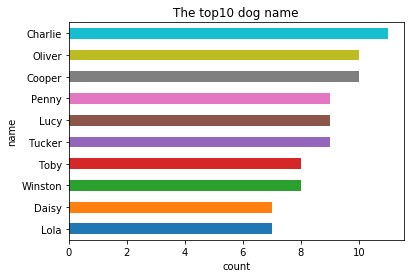

In [105]:
twitter_clean['name'].value_counts().iloc[:10].sort_values().plot.barh(title="The top10 dog name")
plt.ylabel('name')
plt.xlabel('count')
plt.savefig('./The_top10_dog_name.jpg')

Charlie是人们最常给狗起的名字，Oliver\Cooper等名字也很受欢迎


#### 2.狗的评分与转发量和点赞数之间关系

In [106]:
twitter_clean1 = twitter_clean[['rate_group','retweet_count','favorite_count']]

In [107]:
twitter_clean1.groupby('rate_group').mean()

,retweet_count,favorite_count
rate_group,,
high,3254.626590,10601.860051
low,1195.569620,3031.063291
medium,904.055718,2567.894428


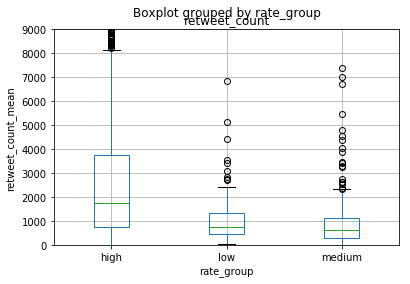

In [108]:
twitter_clean1.boxplot(column='retweet_count',by='rate_group')
plt.ylim(0,9000)
plt.ylabel('retweet_count_mean')
plt.savefig('./The_relationship_between_retweet_count_and_rating.jpg')

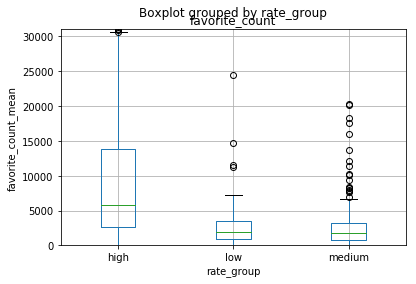

In [109]:
twitter_clean1.boxplot(column='favorite_count',by='rate_group')
plt.ylim(0,31000)
plt.ylabel('favorite_count_mean')
plt.savefig('./The_relationship_between_favorite_count_and_rating.jpg')

评分高的狗的转发量和点赞量是最高的，而评分5-10之间的狗的转发量和点赞量最低

#### 3.哪些品种最受欢迎

In [110]:
twitter_clean2 = twitter_clean[['prediction_result','retweet_count','favorite_count']]

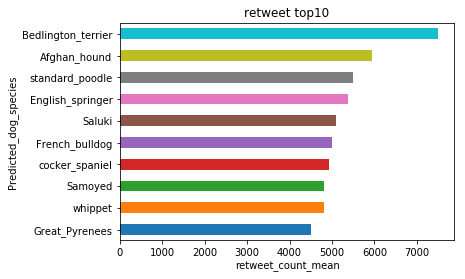

In [111]:
# 平均转发量前十的狗的品种
retweet_type_top10 = twitter_clean2['retweet_count'].groupby(twitter_clean2['prediction_result']).mean().sort_values().tail(10)
retweet_type_top10.sort_values().plot('barh')
plt.xlabel("retweet_count_mean")
plt.ylabel("Predicted_dog_species")
plt.title("retweet top10")
plt.savefig('./retweet_top10.jpg')

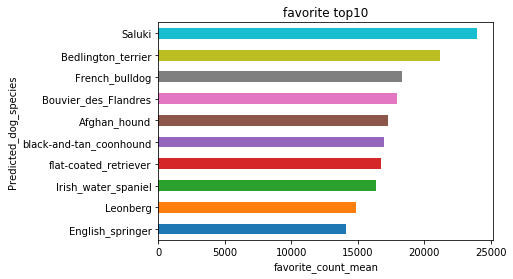

In [112]:
# 平均点赞量前十的狗的品种
favorite_type_top10 = twitter_clean2['favorite_count'].groupby(twitter_clean2['prediction_result']).mean().sort_values().tail(10)
favorite_type_top10.sort_values().plot('barh')
plt.xlabel("favorite_count_mean") # 给x轴命名
plt.ylabel("Predicted_dog_species") # 给y轴命名
plt.title("favorite top10") # 给图片命名
plt.savefig('./favorite_top10.jpg') # 保存图片